# Import the File

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [2]:
test = pd.read_csv('liar_dataset/test.tsv', sep='\t', header=None) 
valid = pd.read_csv('liar_dataset/valid.tsv', sep='\t', header=None)

#Adding Columns - test
test.columns=["Statement_ID","Label", "Statement", "Subject(s)", "Speaker", "Speaker_Job", "State", "Party", "Barely_True_History", 
             "False_History", "Half_True_History", "Mostly_True_History", "Pants_On_Fire_History","Context"]

#Adding Columns - valid
valid.columns=["Statement_ID","Label", "Statement", "Subject(s)", "Speaker", "Speaker_Job", "State", "Party", "Barely_True_History", 
             "False_History", "Half_True_History", "Mostly_True_History", "Pants_On_Fire_History","Context"]

In [3]:
#correctly loads the dataset with no wrong columns
train = pd.read_csv('liar_dataset/train.tsv', sep='\t', header=None)

# Add Column Names

In [4]:
#Adding Columns
train.columns=["Statement_ID","Label", "Statement", "Subject(s)", "Speaker", "Speaker_Job", "State", "Party", "Barely_True_History", 
             "False_History", "Half_True_History", "Mostly_True_History", "Pants_On_Fire_History","Context"]
train.head()

,Statement_ID,Label,Statement,Subject(s),Speaker,Speaker_Job,State,Party,Barely_True_History,False_History,Half_True_History,Mostly_True_History,Pants_On_Fire_History,Context
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN


In [5]:
# combine sets to have same number of features towards the end
df = pd.concat([train, test, valid], ignore_index=True)

# Remove NaN

In [6]:
print("Nan in each columns:" , df.isna().sum(), sep='\n')#print out the number of NaN entries in each column

Nan in each columns:
Statement_ID                0
Label                       0
Statement                   0
Subject(s)                  2
Speaker                     2
Speaker_Job              3567
State                    2749
Party                       2
Barely_True_History         2
False_History               2
Half_True_History           2
Mostly_True_History         2
Pants_On_Fire_History       2
Context                   131
dtype: int64


In [7]:
# Removing NaN
df['Barely_True_History'] = df['Barely_True_History'].fillna(0.0) # Fill NaN with 0.0
df['False_History'] = df['False_History'].fillna(0.0) # Fill NaN with 0.0
df['Half_True_History'] = df['Half_True_History'].fillna(0.0) # Fill NaN with 0.0
df['Mostly_True_History'] = df['Mostly_True_History'].fillna(0.0) # Fill NaN with 0.0
df['Pants_On_Fire_History'] = df['Pants_On_Fire_History'].fillna(0.0) # Fill NaN with 0.0

df = df.fillna(0.0) # fill all NaN with 0.0

In [8]:
print("Nan in each columns:" , df.isna().sum(), sep='\n')#print out the number of NaN entries in each column

Nan in each columns:
Statement_ID             0
Label                    0
Statement                0
Subject(s)               0
Speaker                  0
Speaker_Job              0
State                    0
Party                    0
Barely_True_History      0
False_History            0
Half_True_History        0
Mostly_True_History      0
Pants_On_Fire_History    0
Context                  0
dtype: int64


# Preprocessing Text Data

In [9]:
df_clean = df[['Label', 'Statement']].copy() # Make copy dataset to work off of.

df_clean.head()

,Label,Statement
0,false,Says the Annies List political group supports ...
1,half-true,When did the decline of coal start? It started...
2,mostly-true,"Hillary Clinton agrees with John McCain ""by vo..."
3,false,Health care reform legislation is likely to ma...
4,half-true,The economic turnaround started at the end of ...


## Remove Punctuation

In [10]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [11]:
def remove_punct(text):
    text_nopunct = "".join([char for char in text if char not in string.punctuation])
    return text_nopunct

df_clean['body_text_clean'] = df_clean['Statement'].apply(lambda x: remove_punct(x))

df_clean.head()

,Label,Statement,body_text_clean
0,false,Says the Annies List political group supports ...,Says the Annies List political group supports ...
1,half-true,When did the decline of coal start? It started...,When did the decline of coal start It started ...
2,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",Hillary Clinton agrees with John McCain by vot...
3,false,Health care reform legislation is likely to ma...,Health care reform legislation is likely to ma...
4,half-true,The economic turnaround started at the end of ...,The economic turnaround started at the end of ...


## Tokenization

In [12]:
import re

def tokenize(text):
    tokens = re.split('\W+', text)
    #tokens = " ".join(word for word in tokens)
    return tokens

df_clean['body_text_tokenized'] = df_clean['body_text_clean'].apply(lambda x: tokenize(x.lower()))



df_clean.head()

,Label,Statement,body_text_clean,body_text_tokenized
0,false,Says the Annies List political group supports ...,Says the Annies List political group supports ...,"[says, the, annies, list, political, group, su..."
1,half-true,When did the decline of coal start? It started...,When did the decline of coal start It started ...,"[when, did, the, decline, of, coal, start, it,..."
2,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",Hillary Clinton agrees with John McCain by vot...,"[hillary, clinton, agrees, with, john, mccain,..."
3,false,Health care reform legislation is likely to ma...,Health care reform legislation is likely to ma...,"[health, care, reform, legislation, is, likely..."
4,half-true,The economic turnaround started at the end of ...,The economic turnaround started at the end of ...,"[the, economic, turnaround, started, at, the, ..."


## Removing Stopwords

In [13]:
import nltk

stopword = nltk.corpus.stopwords.words('english')

In [14]:
def remove_stopwords(tokenized_list):
    text = [word for word in tokenized_list if word not in stopword]
    return text

df_clean['body_text_nostop'] = df_clean['body_text_tokenized'].apply(lambda x: remove_stopwords(x))

df_clean.head()

,Label,Statement,body_text_clean,body_text_tokenized,body_text_nostop
0,false,Says the Annies List political group supports ...,Says the Annies List political group supports ...,"[says, the, annies, list, political, group, su...","[says, annies, list, political, group, support..."
1,half-true,When did the decline of coal start? It started...,When did the decline of coal start It started ...,"[when, did, the, decline, of, coal, start, it,...","[decline, coal, start, started, natural, gas, ..."
2,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",Hillary Clinton agrees with John McCain by vot...,"[hillary, clinton, agrees, with, john, mccain,...","[hillary, clinton, agrees, john, mccain, votin..."
3,false,Health care reform legislation is likely to ma...,Health care reform legislation is likely to ma...,"[health, care, reform, legislation, is, likely...","[health, care, reform, legislation, likely, ma..."
4,half-true,The economic turnaround started at the end of ...,The economic turnaround started at the end of ...,"[the, economic, turnaround, started, at, the, ...","[economic, turnaround, started, end, term]"


## Lemmatizing/Stemming

In [15]:
#lemmatizing is more accurate but slower
wn = nltk.WordNetLemmatizer()

def lemmatizing(tokenized_text):
    text = [wn.lemmatize(word) for word in tokenized_text]
    return text

df_clean['body_text_lemmatized'] = df_clean['body_text_nostop'].apply(lambda x: lemmatizing(x))

df_clean.head()

,Label,Statement,body_text_clean,body_text_tokenized,body_text_nostop,body_text_lemmatized
0,false,Says the Annies List political group supports ...,Says the Annies List political group supports ...,"[says, the, annies, list, political, group, su...","[says, annies, list, political, group, support...","[say, annies, list, political, group, support,..."
1,half-true,When did the decline of coal start? It started...,When did the decline of coal start It started ...,"[when, did, the, decline, of, coal, start, it,...","[decline, coal, start, started, natural, gas, ...","[decline, coal, start, started, natural, gas, ..."
2,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",Hillary Clinton agrees with John McCain by vot...,"[hillary, clinton, agrees, with, john, mccain,...","[hillary, clinton, agrees, john, mccain, votin...","[hillary, clinton, agrees, john, mccain, votin..."
3,false,Health care reform legislation is likely to ma...,Health care reform legislation is likely to ma...,"[health, care, reform, legislation, is, likely...","[health, care, reform, legislation, likely, ma...","[health, care, reform, legislation, likely, ma..."
4,half-true,The economic turnaround started at the end of ...,The economic turnaround started at the end of ...,"[the, economic, turnaround, started, at, the, ...","[economic, turnaround, started, end, term]","[economic, turnaround, started, end, term]"


# Vectorizing

In [16]:
# There are a few different types of vectorization:
# 1. Count Vectorization: Takes single words
# 2. N-grams: Takes groups of words (i.e. strings)
# 3. Term frequency - inverse document frequency (TF-IDF): Back to single words
# For the testing purposes of this Thesis, we can just start by using TF-IDF (N-grams too long, CV not too bad)

# Make list into single string
def toll(text):
    text = " ".join(word for word in text)
    return text

df_clean['cleaned_text'] = df_clean['body_text_lemmatized'].apply(lambda x: toll(x))

df_clean.head()

,Label,Statement,body_text_clean,body_text_tokenized,body_text_nostop,body_text_lemmatized,cleaned_text
0,false,Says the Annies List political group supports ...,Says the Annies List political group supports ...,"[says, the, annies, list, political, group, su...","[says, annies, list, political, group, support...","[say, annies, list, political, group, support,...",say annies list political group support thirdt...
1,half-true,When did the decline of coal start? It started...,When did the decline of coal start It started ...,"[when, did, the, decline, of, coal, start, it,...","[decline, coal, start, started, natural, gas, ...","[decline, coal, start, started, natural, gas, ...",decline coal start started natural gas took st...
2,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",Hillary Clinton agrees with John McCain by vot...,"[hillary, clinton, agrees, with, john, mccain,...","[hillary, clinton, agrees, john, mccain, votin...","[hillary, clinton, agrees, john, mccain, votin...",hillary clinton agrees john mccain voting give...
3,false,Health care reform legislation is likely to ma...,Health care reform legislation is likely to ma...,"[health, care, reform, legislation, is, likely...","[health, care, reform, legislation, likely, ma...","[health, care, reform, legislation, likely, ma...",health care reform legislation likely mandate ...
4,half-true,The economic turnaround started at the end of ...,The economic turnaround started at the end of ...,"[the, economic, turnaround, started, at, the, ...","[economic, turnaround, started, end, term]","[economic, turnaround, started, end, term]",economic turnaround started end term


## TF-IDF

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer()
X_tfidf = tfidf_vect.fit_transform(df_clean['cleaned_text']) # Read in the pre-processed data

print(X_tfidf.shape)

(12791, 13141)


In [18]:
# Create a matrix with the TF-IDF values
X_tfidf_df = pd.DataFrame(X_tfidf.toarray())

# Add column names
X_tfidf_df.columns = tfidf_vect.get_feature_names()


X_tfidf_df #product of all of the preprocessing

# NOTE, in the end this was found to be too many features and so this TF-IDF section was dropped.

,00,004,005,01,02,025,03,04,047,05,...,zip,zippo,zombie,zone,zoning,zoo,zuckerberg,zuckerbergs,zvisa,ʺmore
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12786,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12787,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12788,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12789,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Meta Data Preprocessing

In [19]:
# Use one hot encoding to convert categorical values into numerical values
# First remove the columns we won't use
hot_coding_data = df.copy()
hot_coding_data = hot_coding_data.drop(columns = ['Statement_ID', 'Label', 'Statement', 
                                                  'Barely_True_History', 'False_History', 
                                                  'Half_True_History','Mostly_True_History',
                                                  'Pants_On_Fire_History'])

hot_coding_data 

,Subject(s),Speaker,Speaker_Job,State,Party,Context
0,abortion,dwayne-bohac,State representative,Texas,republican,a mailer
1,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,a floor speech.
2,foreign-policy,barack-obama,President,Illinois,democrat,Denver
3,health-care,blog-posting,0,0,none,a news release
4,"economy,jobs",charlie-crist,0,Florida,democrat,an interview on CNN
...,...,...,...,...,...,...
12786,"energy,oil-spill,trade",barack-obama,President,Illinois,democrat,a press conference
12787,candidates-biography,hillary-clinton,Presidential candidate,New York,democrat,a speech on the economy
12788,health-care,campaign-defend-america,0,"Washington, D.C.",none,a television ad
12789,health-care,americans-united-change,0,0,none,an Internet ad.


In [20]:
#put all of the columns into numerical values using one hot encoding.
hot_coding_data = pd.get_dummies(hot_coding_data, columns=['Subject(s)'], prefix = '', drop_first = False)
hot_coding_data = pd.get_dummies(hot_coding_data, columns=['Speaker'], prefix = '', drop_first = False)
hot_coding_data = pd.get_dummies(hot_coding_data, columns=['Speaker_Job'], prefix = '', drop_first = False)
hot_coding_data = pd.get_dummies(hot_coding_data, columns=['State'], prefix = '', drop_first = False)
hot_coding_data = pd.get_dummies(hot_coding_data, columns=['Party'], prefix = '', drop_first = False)
hot_coding_data = pd.get_dummies(hot_coding_data, columns=['Context'], prefix = '', drop_first = False)

In [21]:
# NOTE, this, like the TF-IDF features, was found to be too large and so was dropped from the final version
hot_coding_data

,_0.0,_Alcohol,"_Alcohol,animals,children,crime","_Alcohol,campaign-finance,ethics,public-service","_Alcohol,candidates-biography","_Alcohol,candidates-biography,crime","_Alcohol,children","_Alcohol,children,crime,public-health,public-safety","_Alcohol,children,drugs,marijuana","_Alcohol,city-government",...,_website posting.,_weekly Senate Republican radio address,_while interviewing Donald Trump in Austin,_whylarrywhy.com,_women's conference session,_written testimony at a House hearing,_written testimony to a Wisconsin Senate committee,_x,_yard signs posted anonymously opposing a proposed office park redevelopment in Northwest Austin,"_“Voters Guide,” League of Women Voters of the Austin Area."
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12786,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12787,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12788,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12789,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Feature Engineering

In [22]:
data = df[['Label', 'Statement']].copy()

data.head()

,Label,Statement
0,false,Says the Annies List political group supports ...
1,half-true,When did the decline of coal start? It started...
2,mostly-true,"Hillary Clinton agrees with John McCain ""by vo..."
3,false,Health care reform legislation is likely to ma...
4,half-true,The economic turnaround started at the end of ...


In [23]:
# These are the functions needed for removing the features as seen below

def no_of_stopwords(x):
    sw = nltk.corpus.stopwords.words('english') 
    word_tokens = nltk.sent_tokenize(x)
    stopwords_x = [w for w in word_tokens if w in sw]
    return len(stopwords_x)


def count_punc(x):
    punctuations= string.punctuation
    d=dict()
    for i in punctuations:
        d[str(i)+' count']=x.count(i)
    count = 0
    for i in d:
        count += d[i]
    return count

def count_words_in_quotes(x):
    add = re.findall(r'["](.*?)["]',x)
    count=0
    if add is None:
        return 0
    else:
        for i in add:
            t=i#[1:-1]
            #print("t is: ", t)
            count+=len(t) - t.count(" ")
        return count

In [24]:
# First ten features
data['body_len'] = data['Statement'].apply(lambda x: len(x) - x.count(" "))          # First Feature - number of letters
data['no_of_words'] = data['Statement'].apply(lambda x: len(x.split()))              # Second Feature - number of words
data['no_of_sent'] = data['Statement'].apply(lambda x: len(nltk.sent_tokenize(x)))   # Third Feature - number of sentences
data['no_of_unique_words'] = data['Statement'].apply(lambda x: len(set(x.split())))  # Fourth Feature - # of unique words
data['no_of_stopwords'] = data['Statement'].apply(lambda x: no_of_stopwords(x))      # Fifth Feature - # of stopwords
data['avg_word_len'] = data['body_len']/data['no_of_words']                          # Sixth Feature - avg word length
data['avg_%_stopwords'] = data['no_of_stopwords']/data['no_of_words']                # Seventh Feature - avg % being stopwords
data['no_of_punc'] = data['Statement'].apply(lambda x: count_punc(x))                # Eight Feature - amount of punctuation
data['words_in_quote'] = data['Statement'].apply(lambda x: count_words_in_quotes(x)) # Ninth Feature - # of words in quotes
data['%_of_unique_words'] = data['no_of_unique_words']/data['no_of_words']           # Tenth Feature - % of words that are unique




In [25]:
from collections import Counter

# This box is preparing the data to be run through the function that determines the types of words in each entry
# for example if there are nouns or proper nouns or verbs in a particular statement.

df_token = df_clean[['body_text_tokenized']]

tok = df_token.to_numpy()

hold = ['Hello,', "my", "name", "is", "Chris"]

# Changes all of the numbers into strings
for text in tok:
    #print(text)
    for w in text:
        for word in w:
            #print(type(word))
            if word.isdigit():
                num = int(word)
entries = {}
entries[0] = {}

for i in range(0, len(tok)):
    tagged = nltk.pos_tag([q for q in tok[i][0] if q])
    counts = Counter(tag for word, tag in tagged)
    entries[i] = counts

In [26]:
word_structure = pd.DataFrame.from_dict(entries) # make a new dataframe
# swap the rows and columns
word_structure = word_structure.T
# replace NAN
word_structure = word_structure.fillna(0.0)

word_structure

,VBZ,DT,NNS,VBP,JJ,NN,IN,WRB,VBD,PRP,...,NNP,WDT,MD,PDT,EX,RBS,$,WP$,FW,UH
0,2.0,1.0,2.0,1.0,1.0,3.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,2.0,7.0,3.0,2.0,5.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,2.0,0.0,0.0,1.0,7.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,0.0,2.0,6.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,2.0,0.0,0.0,1.0,3.0,2.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12786,0.0,3.0,1.0,0.0,1.0,4.0,6.0,0.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12787,2.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12788,0.0,1.0,1.0,1.0,1.0,6.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12789,2.0,4.0,1.0,2.0,3.0,10.0,1.0,0.0,0.0,2.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
# Features 11 - 20
# Second ten features
data['no_of_numerical'] = data['Statement'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))  # 11th feature amount of numerical values
data['upper_case_words'] = data['Statement'].apply(lambda x: len([x for x in x.split() if x.isupper()])) # 12th feature amount of uppercase words
data['avg_sentence_length'] = data['no_of_words']/data['no_of_sent']                                     # 13th feature average sentence length
data['no_of_nouns'] = word_structure['NN'] + word_structure['NNS']                                       # 14th feature amount of nouns in entry
data['proper_nouns'] = word_structure['NNP'] + word_structure['NNPS']                                    # 15th feature number of proper nouns
data['no_of_base_verbs'] = word_structure['VB']                                                          # 16th feature number of base verbs
data['past_tense_verbs'] = word_structure['VBD']                                                         # 17th feature number of past tense verbs
data['verb_participle'] = word_structure['VBG'] + word_structure['VBN']                                  # 18th feature number of participle verbs
data['no_of_adj'] = word_structure['JJ'] + word_structure['JJR'] + word_structure['JJS']                 # 19th feature number of adjectives
data['personal_pronouns'] = word_structure['PRP']                                                        # 20th feature number of personal pronouns


In [28]:
# Features 21 - 30
# Third ten features
data['no_of_particles'] = word_structure['RP']                                               # 21st feature, number of particles
data['no_of_prepositions'] = word_structure['IN']                                            # 22nd feature, number of prepositions
data['no_of_foreign_words'] = word_structure['FW']                                           # 23rd feature, number of foreign words 
data['no_of_adverbs'] = word_structure['RB'] + word_structure['RBR'] + word_structure['RBS'] # 24th feature, number of adverbs
data['pos_pronouns'] = word_structure['PRP$']                                                # 25th feature, number of possessive pronouns
data['no_of_numerals'] = word_structure['CD']                                                # 26th feature, number of numbers
data['no_of_interjections'] = word_structure['UH']                                           # 27th feature, number of interjections
data['no_of_determiners'] = word_structure['DT']                                             # 28th feature, number of determiners
data['no_of_predeterminers'] = word_structure['PDT']                                         # 29th feature, number of pre-determiners
# 30th feature, number of wh- question words
data['WH_questions'] = word_structure['WDT'] + word_structure['WP'] + word_structure['WP$'] + word_structure['WRB']

In [29]:
# Features 31 - 40
# Fourth ten features
data['no_long_words'] = data['Statement'].apply(lambda x: len([x for x in x.split()if x and len(x) > 6]))   # feature 31, number of "long" words
data['no_short_words'] = data['Statement'].apply(lambda x: len([x for x in x.split()if x and len(x) <= 6])) # feature 32, number of "short" words
data['no_very_short_words'] = data['Statement'].apply(lambda x: len([x for x in x.split()if x and len(x) < 3])) # feature 33, number of "very short" words
data['no_very_long_words'] = data['Statement'].apply(lambda x: len([x for x in x.split()if x and len(x) > 9])) # feature 34, number of "very long" words
data['percent_long_words'] = data['no_long_words']/data['no_of_words']                                         # feature 35, % of long words
data['percent_very_long_words'] = data['no_very_long_words']/data['no_of_words']                               # feature 36, % very long words
data['percent_very_short_words'] = data['no_very_short_words']/data['no_of_words']                             # feature 37, % very short words
data['avg_long_word_per_sentence'] = data['no_long_words']/data['no_of_sent']                                  # feature 38, number of long words in sentences
data['%_nouns'] = data['no_of_nouns']/data['no_of_words']                                                      # feature 39, % that is nouns
data['%_adjectives'] = data['no_of_adj']/data['no_of_words']                                                   # feature 40, % that is adjectives

In [30]:
# Features 41 - 50
# Fifth ten features
data['%_particles'] = data['no_of_particles']/data['no_of_words']                               # feature 41, % that is particles
data['%_prepositions'] = data['no_of_prepositions']/data['no_of_words']                         # feature 42, % that is prepositions
data['%_adverbs'] = data['no_of_adverbs']/data['no_of_words']                                   # feature 43, % that is adverbs
data['%_WH_questions'] = data['WH_questions']/data['no_of_words']                               # feature 44, % that is WH questions
data['%_verbs'] = (data['no_of_base_verbs'] + data['past_tense_verbs'])/data['no_of_words']     # feature 45, % that are verbs
data['%_personal_pronouns'] = data['personal_pronouns']/data['no_of_words']                     # feature 46, % that are personal pronouns
data['%_proper_nouns'] = data['proper_nouns']/data['no_of_words']                               # feature 47, % that are proper pronouns
data['%_numerals'] = data['no_of_numerals']/data['no_of_words']                                 # feature 48, % that are numbers
data['%_in_quotes'] = data['words_in_quote']/data['no_of_words']                                # feature 49, % of words that are in quotes
data['%_determiners'] = data['no_of_determiners']/data['no_of_words']                           # feature 50, % of words that are determiners

data

,Label,Statement,body_len,no_of_words,no_of_sent,no_of_unique_words,no_of_stopwords,avg_word_len,avg_%_stopwords,no_of_punc,...,%_particles,%_prepositions,%_adverbs,%_WH_questions,%_verbs,%_personal_pronouns,%_proper_nouns,%_numerals,%_in_quotes,%_determiners
0,false,Says the Annies List political group supports ...,72,11,1,11,0,6.545455,0.0,2,...,0.000000,0.090909,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.090909
1,half-true,When did the decline of coal start? It started...,118,24,2,23,0,4.916667,0.0,5,...,0.041667,0.125000,0.000000,0.083333,0.250000,0.041667,0.0,0.000000,0.000000,0.041667
2,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",87,19,1,18,0,4.578947,0.0,3,...,0.000000,0.263158,0.000000,0.000000,0.052632,0.000000,0.0,0.000000,2.684211,0.105263
3,false,Health care reform legislation is likely to ma...,67,12,1,12,0,5.583333,0.0,1,...,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.0,0.000000,0.000000,0.000000
4,half-true,The economic turnaround started at the end of ...,45,10,1,10,0,4.500000,0.0,1,...,0.000000,0.200000,0.000000,0.000000,0.100000,0.000000,0.0,0.000000,0.000000,0.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12786,half-true,"For the first time in more than a decade, impo...",85,20,1,19,0,4.250000,0.0,4,...,0.000000,0.300000,0.000000,0.000000,0.100000,0.050000,0.0,0.000000,0.000000,0.150000
12787,mostly-true,Says Donald Trump has bankrupted his companies...,69,14,1,13,0,4.928571,0.0,2,...,0.000000,0.000000,0.285714,0.000000,0.000000,0.000000,0.0,0.071429,0.000000,0.000000
12788,true,"John McCain and George Bush have ""absolutely n...",68,13,1,13,0,5.230769,0.0,3,...,0.000000,0.076923,0.076923,0.000000,0.000000,0.000000,0.0,0.000000,3.000000,0.076923
12789,false,A new poll shows 62 percent support the presid...,164,33,2,29,0,4.969697,0.0,6,...,0.000000,0.030303,0.000000,0.030303,0.030303,0.060606,0.0,0.030303,0.000000,0.121212


# Meta Data Feature Extraction

In [31]:
# This section was done as a replacement for the hot_coding_data section used previously

data_hold = df.copy()

In [32]:
# Replace republican with 2, Democrat with 1, and none/independent with 8
# Replace third party with 3
# Replace official with 4, organization with 5
# Replace journalist/journalist entertainers with 6
# Replace other with 7

data_hold['Party'] = data_hold['Party'].replace(['republican', 'democrat','none', 'independent'],[2, 1, 8, 8])
data_hold['Party'] = data_hold['Party'].replace(['libertarian', 'green', 'Moderate', 'democratic-farmer-labor',
                                                 'ocean-state-tea-party-action', 'constitution-party',
                                                'labor-leader', 'tea-party-member'], 3)
data_hold['Party'] = data_hold['Party'].replace(['state-official', 'education-official', 'organization', 
                                                 'government-body'],[4,4,5,4])
data_hold['Party'] = data_hold['Party'].replace(['columnist', 'talk-show-host', 'newsmaker', 'journalist'],6)
data_hold['Party'] = data_hold['Party'].replace(['activist', 'business-leader', 'liberal-party-canada',
                                                 'county-commissioner'],7)
extracted_col = data_hold['Party']
data = data.join(extracted_col)

In [33]:
# Add history of the speaker to the features
# Barely_True_History has only integers, 30 unique values
# False_History has only integers, 30 unique values
# Half_True_History has only integers, 29 unique values
# Mostly_True_History has only integers, 27 unique values
# Pants_On_Fire_History has only integers, 20 unique values

extracted_cols = data_hold[['Barely_True_History', 'False_History', 'Half_True_History', 
                            'Mostly_True_History', 'Pants_On_Fire_History']]
data=data.join(extracted_cols)

In [34]:
# The below features were removed as they caused overfitting of the Bi-LSTM network

# data['Speaker'] = pd.factorize(data_hold.Speaker)[0] + 1
# data['State'] = pd.factorize(data_hold.State)[0] + 1
# data_hold['Subject'] = data_hold['Subject(s)']
# # data_hold = data_hold.drop(['Subject(s)'])
# data['Subject'] = pd.factorize(data_hold['Subject'])[0] + 1
# data['Speaker_Job'] = pd.factorize(data_hold['Speaker_Job'])[0] + 1
# data['Context'] = pd.factorize(data_hold['Context'])[0] + 1
# print(data_hold['Speaker'].nunique())

data

,Label,Statement,body_len,no_of_words,no_of_sent,no_of_unique_words,no_of_stopwords,avg_word_len,avg_%_stopwords,no_of_punc,...,%_proper_nouns,%_numerals,%_in_quotes,%_determiners,Party,Barely_True_History,False_History,Half_True_History,Mostly_True_History,Pants_On_Fire_History
0,false,Says the Annies List political group supports ...,72,11,1,11,0,6.545455,0.0,2,...,0.0,0.000000,0.000000,0.090909,2.0,0.0,1.0,0.0,0.0,0.0
1,half-true,When did the decline of coal start? It started...,118,24,2,23,0,4.916667,0.0,5,...,0.0,0.000000,0.000000,0.041667,1.0,0.0,0.0,1.0,1.0,0.0
2,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",87,19,1,18,0,4.578947,0.0,3,...,0.0,0.000000,2.684211,0.105263,1.0,70.0,71.0,160.0,163.0,9.0
3,false,Health care reform legislation is likely to ma...,67,12,1,12,0,5.583333,0.0,1,...,0.0,0.000000,0.000000,0.000000,8.0,7.0,19.0,3.0,5.0,44.0
4,half-true,The economic turnaround started at the end of ...,45,10,1,10,0,4.500000,0.0,1,...,0.0,0.000000,0.000000,0.200000,1.0,15.0,9.0,20.0,19.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12786,half-true,"For the first time in more than a decade, impo...",85,20,1,19,0,4.250000,0.0,4,...,0.0,0.000000,0.000000,0.150000,1.0,70.0,71.0,160.0,163.0,9.0
12787,mostly-true,Says Donald Trump has bankrupted his companies...,69,14,1,13,0,4.928571,0.0,2,...,0.0,0.071429,0.000000,0.000000,1.0,40.0,29.0,69.0,76.0,7.0
12788,true,"John McCain and George Bush have ""absolutely n...",68,13,1,13,0,5.230769,0.0,3,...,0.0,0.000000,3.000000,0.076923,8.0,0.0,1.0,0.0,2.0,0.0
12789,false,A new poll shows 62 percent support the presid...,164,33,2,29,0,4.969697,0.0,6,...,0.0,0.030303,0.000000,0.121212,8.0,1.0,4.0,4.0,1.0,0.0


# Feature Selection

In [35]:
# Add the random forest imports
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.feature_selection import SelectFromModel

data_train = data.drop(columns = ['Label', 'Statement'])

df_features = data_train.copy()

In [36]:
# Split the datasets back into training, testing and validation
df_1 = df_features.iloc[:10240,:]
df_2 = df_features.iloc[10240:,:]

testing = df_2.iloc[:1267,:]
validate = df_2.iloc[1267:,:]
testing = testing.reset_index()
validate = validate.reset_index()


testing = testing.drop(columns = ['index'])
validate = validate.drop(columns = ['index'])

In [37]:
# Create the model with 100 trees
model = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')

In [38]:
# Fit on training data
model.fit(df_1, train['Label'])

RandomForestClassifier(max_features='sqrt')

In [39]:
# Get the most important features, and print them out in descending order of importance.

feature_importances = pd.DataFrame(model.feature_importances_, index = df_1.columns,  
                                   columns=['importance']).sort_values('importance', ascending=False)
feature_importances.head(20)

,importance
Mostly_True_History,0.058868
Half_True_History,0.056014
False_History,0.054903
Barely_True_History,0.049960
Pants_On_Fire_History,0.036356
avg_word_len,0.036334
%_nouns,0.033801
percent_very_short_words,0.032236
%_prepositions,0.031613
body_len,0.031403


In [40]:
# Begin feature selection
rf_model = SelectFromModel(model, threshold = 0.001)
rf_model.fit(df_1, train['Label'])

SelectFromModel(estimator=RandomForestClassifier(max_features='sqrt'),
                threshold=0.001)

In [41]:
# Transform the data to create a new dataset containing only the most important features
# Note: We have to apply the transform to both the training X and test X data.
rf_2_train = rf_model.transform(df_1)
rf_2_test = rf_model.transform(testing)
rf_2_valid = rf_model.transform(validate)

# Random Forest Training and Testing

In [42]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# function for running through the random forest model several times
def forest():
    rf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1) # n_jobs makes it go fast, random state increases the accuracy
    
    rf.fit(rf_2_train,train['Label'])
    
    # Actual class predictions
    rf_model_t = rf.predict(rf_2_test)
    rf_model_v = rf.predict(rf_2_valid)

    # View accuracy score
    rf_test_sc = accuracy_score(test['Label'], rf_model_t)
    rf_valid_sc = accuracy_score(valid['Label'], rf_model_v)
    
    return rf_test_sc, rf_valid_sc

# function for getting the average of several numbers
def cal_average(num):
    sum_num = 0
    for t in num:
        sum_num = sum_num + t           
    if len(num) > 0:
        avg = sum_num / len(num)
    else: 
        avg = 0
    return avg

In [43]:
# Train the random forest classifier 10 times and get the average score for both the test and valid data set.

features_normal_t = []
features_normal_v = []

for i in range(10):
    test_sc, valid_sc = forest()
    features_normal_t.append(test_sc)
    features_normal_v.append(valid_sc)

normal_t = cal_average(features_normal_t)
normal_v = cal_average(features_normal_v)

print("Test score is: ", normal_t)
print("Valid score is: ", normal_v)

Test score is:  0.44672454617206003
Valid score is:  0.4369158878504673


# Bi-LSTM Model

In [44]:
# The links that will be used

print("For the Bi-LSTM code: https://medium.com/analytics-vidhya/building-a-text-classification-model-using-bilstm-c0548ace26f2")

For the Bi-LSTM code: https://medium.com/analytics-vidhya/building-a-text-classification-model-using-bilstm-c0548ace26f2


In [45]:
from sklearn.ensemble import VotingClassifier
from keras.wrappers.scikit_learn import KerasClassifier

from keras.layers import Dropout, Dense, Embedding, LSTM, Bidirectional
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from sklearn.metrics import matthews_corrcoef, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.utils import shuffle
import numpy as np
import pickle
import warnings
import logging
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Import the tools we will need from keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# Initialize and fit the tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train['Statement'])

In [46]:
# This function will build the Bi-LSTM model
def bilstm_initialize(nclasses, dropout=0.5, hidden_layer = 3, lstm_node = 32):
    model = Sequential()
    model.add(Embedding(len(tokenizer.index_word)+1, 32))
    for i in range(0,hidden_layer):
        # Add a bidirectional lstm layer
        model.add(Bidirectional(LSTM(lstm_node, return_sequences=True, recurrent_dropout=0.2)))
        # Add a dropout layer after each lstm layer
        model.add(Dropout(dropout))
    model.add(Bidirectional(LSTM(lstm_node, recurrent_dropout=0.2)))
    model.add(Dropout(dropout))
    # Add the fully connected layer with 256 nurons and relu activation
    model.add(Dense(256, activation='relu'))
    # Add the output layer with softmax activation since we have 2 classes
    model.add(Dense(nclasses, activation='softmax'))
    # Compile the model using sparse_categorical_crossentropy
    model.compile(loss='sparse_categorical_crossentropy',
                      optimizer='adam',
                      metrics=['accuracy'])
    return model

In [47]:
# Calculate the score of the Neural Network model

def get_eval_report(labels, preds):
    mcc = matthews_corrcoef(labels, preds)
    print(confusion_matrix(labels, preds))
    print(confusion_matrix(labels, preds).ravel())
    tn, fp, fn, tp = confusion_matrix(labels, preds).ravel()
    precision = (tp)/(tp+fp)
    recall = (tp)/(tp+fn)
    f1 = (2*(precision*recall))/(precision+recall)
    return {
        "mcc": mcc,
        "true positive": tp,
        "true negative": tn,
        "false positive": fp,
        "false negative": fn,
        "pricision" : precision,
        "recall" : recall,
        "F1" : f1,
        "accuracy": (tp+tn)/(tp+tn+fp+fn)
    }


def compute_metrics(labels, preds):
    assert len(preds) == len(labels)
    return get_eval_report(labels, preds)


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string], '')
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

In [48]:
# Create the model
model_bilstm = bilstm_initialize(6)
model_bilstm.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          397088    
_________________________________________________________________
bidirectional (Bidirectional (None, None, 64)          16640     
_________________________________________________________________
dropout (Dropout)            (None, None, 64)          0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, None, 64)          24832     
_________________________________________________________________
dropout_1 (Dropout)          (None, None, 64)          0         
_________________________________________________________________
bidirectional_2 (Bidirection (None, None, 64)          24832     
_________________________________________________________________
dropout_2 (Dropout)          (None, None, 64)          0

In [49]:
# Make the categorical values numbers
y_train = train[['Label']]
y_test = test[['Label']]
y_valid = valid[['Label']]


# replace the y_training values
y_train = y_train.replace('false', 0)
y_train = y_train.replace('half-true', 1)
y_train = y_train.replace('mostly-true', 2)
y_train = y_train.replace('true', 3)
y_train = y_train.replace('barely-true', 4)
y_train = y_train.replace('pants-fire', 5)

# replace the y_testing values
y_test = y_test.replace('false', 0)
y_test = y_test.replace('half-true', 1)
y_test = y_test.replace('mostly-true', 2)
y_test = y_test.replace('true', 3)
y_test = y_test.replace('barely-true', 4)
y_test = y_test.replace('pants-fire', 5)

# replace the y_testing values
y_valid = y_valid.replace('false', 0)
y_valid = y_valid.replace('half-true', 1)
y_valid = y_valid.replace('mostly-true', 2)
y_valid = y_valid.replace('true', 3)
y_valid = y_valid.replace('barely-true', 4)
y_valid = y_valid.replace('pants-fire', 5)

In [50]:
# Train the Bi-LSTM
history = model_bilstm.fit(rf_2_train, y_train, 
                    batch_size=128, epochs=15,
                    validation_data=(rf_2_valid, y_valid)) # test its accuracy with the validation data set

Epoch 1/15
80/80 [==============================] - 20s 145ms/step - loss: 1.7689 - accuracy: 0.1913 - val_loss: 1.7648 - val_accuracy: 0.1931
Epoch 2/15
80/80 [==============================] - 10s 124ms/step - loss: 1.7528 - accuracy: 0.1999 - val_loss: 1.7277 - val_accuracy: 0.2173
Epoch 3/15
80/80 [==============================] - 12s 146ms/step - loss: 1.7353 - accuracy: 0.2073 - val_loss: 1.7205 - val_accuracy: 0.2243
Epoch 4/15
80/80 [==============================] - 11s 141ms/step - loss: 1.7287 - accuracy: 0.2218 - val_loss: 1.7153 - val_accuracy: 0.2313
Epoch 5/15
80/80 [==============================] - 10s 130ms/step - loss: 1.7197 - accuracy: 0.2321 - val_loss: 1.7150 - val_accuracy: 0.2235
Epoch 6/15
80/80 [==============================] - 10s 129ms/step - loss: 1.7203 - accuracy: 0.2322 - val_loss: 1.7094 - val_accuracy: 0.2352
Epoch 7/15
80/80 [==============================] - 11s 133ms/step - loss: 1.7121 - accuracy: 0.2320 - val_loss: 1.7175 - val_accuracy: 0.2290

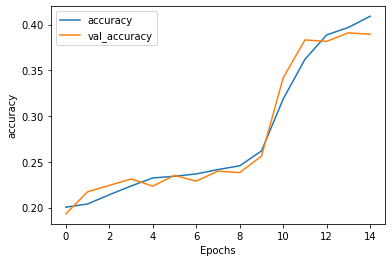

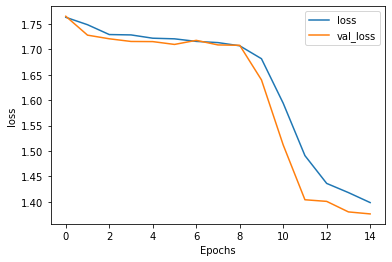

In [51]:
# Display the resulting accuracy and loss over the epochs
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [52]:
# Evaluate the model
print("\n Evaluating Model ... \n")
predicted = model_bilstm.predict_classes(rf_2_test)
print(metrics.classification_report(y_test, predicted))


 Evaluating Model ... 



/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

           0       0.35      0.50      0.41       249
           1       0.34      0.34      0.34       265
           2       0.35      0.66      0.46       241
           3       0.91      0.15      0.26       208
           4       0.66      0.19      0.29       212
           5       0.54      0.61      0.57        92

    accuracy                           0.39      1267
   macro avg       0.53      0.41      0.39      1267
weighted avg       0.51      0.39      0.37      1267



In [53]:
# Determine its accuracy
accr = model_bilstm.evaluate(rf_2_test,y_test)
print('Test set for dropout = 0.5:\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

40/40 [==============================] - 1s 27ms/step - loss: 1.4023 - accuracy: 0.3946
Test set for dropout = 0.5:
  Loss: 1.402
  Accuracy: 0.395


# Ensemble Method

In [54]:
kModel = KerasClassifier(build_fn = lambda: bilstm_initialize(6), epochs=15, batch_size=128, verbose=1)
kModel._estimator_type = "classifier"

# Create a new random forest classifier for the most important features
rf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)

In [55]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score

def voting_class(nn, forest):
    vote_test = VotingClassifier(
     estimators=[('Bi-LSTM', kModel), ('rf', rf)],
     voting='soft', weights=[nn,forest], flatten_transform=True)
    
    t = test['Label']
    v = valid['Label']
    
    vote_test = vote_test.fit(rf_2_train, train["Label"])
    
    vote_pred = vote_test.predict(rf_2_test)
    
    # get accuracy
    vote_sc = accuracy_score(t, vote_pred)
    
    # get precision
    vote_pre = precision_score(t, vote_pred, average=None)
    
    # get recall
    vote_rec = recall_score(t, vote_pred, average=None)

    return vote_sc, vote_pre, vote_rec

In [56]:
arr = []
pre = []
rec = []
f1 = []

for i in range(10):
    print("This is turn: ", i+1)
    score, precision, recall = voting_class(1,2)
    f = (2*precision*recall)/(precision+recall)
    arr.append(score)
    pre.append(precision)
    rec.append(recall)
    f1.append(f)
    
print(arr)
#TAKE FROM ME
avg_slight_rf = cal_average(arr)
prec_avg = cal_average(pre)
rec_avg = cal_average(rec)
f1_avg = cal_average(f1)

total_prec = cal_average(prec_avg)
total_rec = cal_average(rec_avg)
total_f1 = cal_average(f1_avg)
print("The average for 1,2 is: ", avg_slight_rf)
print("precision: ", prec_avg, '\n', total_prec)
print("recall: ", rec_avg, '\n', total_rec)

This is turn:  1
Epoch 1/15
80/80 [==============================] - 18s 119ms/step - loss: 1.7701 - accuracy: 0.2043
Epoch 2/15
80/80 [==============================] - 10s 124ms/step - loss: 1.7555 - accuracy: 0.2073
Epoch 3/15
80/80 [==============================] - 10s 123ms/step - loss: 1.7328 - accuracy: 0.2220
Epoch 4/15
80/80 [==============================] - 13s 158ms/step - loss: 1.7312 - accuracy: 0.2142
Epoch 5/15
80/80 [==============================] - 11s 139ms/step - loss: 1.7228 - accuracy: 0.2252
Epoch 6/15
80/80 [==============================] - 10s 128ms/step - loss: 1.6939 - accuracy: 0.2484
Epoch 7/15
80/80 [==============================] - 10s 124ms/step - loss: 1.5946 - accuracy: 0.3118
Epoch 8/15
80/80 [==============================] - 10s 126ms/step - loss: 1.4574 - accuracy: 0.3661
Epoch 9/15
80/80 [==============================] - 11s 135ms/step - loss: 1.4306 - accuracy: 0.3851
Epoch 10/15
80/80 [==============================] - 11s 142ms/step - loss

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


10/10 [==============================] - 2s 29ms/step
This is turn:  2
Epoch 1/15
80/80 [==============================] - 18s 109ms/step - loss: 1.7710 - accuracy: 0.2017
Epoch 2/15
80/80 [==============================] - 9s 117ms/step - loss: 1.7524 - accuracy: 0.2097
Epoch 3/15
80/80 [==============================] - 11s 133ms/step - loss: 1.7352 - accuracy: 0.2184
Epoch 4/15
80/80 [==============================] - 11s 139ms/step - loss: 1.7204 - accuracy: 0.2230
Epoch 5/15
80/80 [==============================] - 10s 119ms/step - loss: 1.7210 - accuracy: 0.2270
Epoch 6/15
80/80 [==============================] - 11s 132ms/step - loss: 1.7143 - accuracy: 0.2374
Epoch 7/15
80/80 [==============================] - 10s 124ms/step - loss: 1.7134 - accuracy: 0.2421
Epoch 8/15
80/80 [==============================] - 10s 126ms/step - loss: 1.6838 - accuracy: 0.2592
Epoch 9/15
80/80 [==============================] - 10s 131ms/step - loss: 1.5864 - accuracy: 0.3197
Epoch 10/15
80/80 [==

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


10/10 [==============================] - 2s 28ms/step
This is turn:  3
Epoch 1/15
80/80 [==============================] - 19s 114ms/step - loss: 1.7689 - accuracy: 0.1942
Epoch 2/15
80/80 [==============================] - 10s 123ms/step - loss: 1.7586 - accuracy: 0.1969
Epoch 3/15
80/80 [==============================] - 11s 141ms/step - loss: 1.7361 - accuracy: 0.2095
Epoch 4/15
80/80 [==============================] - 10s 127ms/step - loss: 1.7242 - accuracy: 0.2286
Epoch 5/15
80/80 [==============================] - 10s 121ms/step - loss: 1.7255 - accuracy: 0.2299
Epoch 6/15
80/80 [==============================] - 10s 119ms/step - loss: 1.7173 - accuracy: 0.2325
Epoch 7/15
80/80 [==============================] - 10s 129ms/step - loss: 1.6747 - accuracy: 0.2646
Epoch 8/15
80/80 [==============================] - 10s 127ms/step - loss: 1.5885 - accuracy: 0.3135
Epoch 9/15
80/80 [==============================] - 10s 125ms/step - loss: 1.5043 - accuracy: 0.3573
Epoch 10/15
80/80 [=

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


10/10 [==============================] - 2s 29ms/step
This is turn:  4
Epoch 1/15
80/80 [==============================] - 18s 117ms/step - loss: 1.7706 - accuracy: 0.1962
Epoch 2/15
80/80 [==============================] - 12s 156ms/step - loss: 1.7521 - accuracy: 0.2045
Epoch 3/15
80/80 [==============================] - 11s 136ms/step - loss: 1.7349 - accuracy: 0.2155
Epoch 4/15
80/80 [==============================] - 12s 151ms/step - loss: 1.7198 - accuracy: 0.2225
Epoch 5/15
80/80 [==============================] - 12s 147ms/step - loss: 1.7180 - accuracy: 0.2374
Epoch 6/15
80/80 [==============================] - 11s 139ms/step - loss: 1.7064 - accuracy: 0.2478
Epoch 7/15
80/80 [==============================] - 10s 128ms/step - loss: 1.6321 - accuracy: 0.2871
Epoch 8/15
80/80 [==============================] - 11s 138ms/step - loss: 1.5008 - accuracy: 0.3543
Epoch 9/15
80/80 [==============================] - 10s 123ms/step - loss: 1.4397 - accuracy: 0.3808
Epoch 10/15
80/80 [=

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


10/10 [==============================] - 2s 33ms/step
This is turn:  5
Epoch 1/15
80/80 [==============================] - 19s 114ms/step - loss: 1.7708 - accuracy: 0.1933
Epoch 2/15
80/80 [==============================] - 11s 139ms/step - loss: 1.7560 - accuracy: 0.1998
Epoch 3/15
80/80 [==============================] - 12s 148ms/step - loss: 1.7337 - accuracy: 0.2142
Epoch 4/15
80/80 [==============================] - 10s 123ms/step - loss: 1.7288 - accuracy: 0.2139
Epoch 5/15
80/80 [==============================] - 10s 128ms/step - loss: 1.7310 - accuracy: 0.2155
Epoch 6/15
80/80 [==============================] - 11s 142ms/step - loss: 1.7167 - accuracy: 0.2237
Epoch 7/15
80/80 [==============================] - 10s 124ms/step - loss: 1.7036 - accuracy: 0.2297
Epoch 8/15
80/80 [==============================] - 10s 123ms/step - loss: 1.6577 - accuracy: 0.2804
Epoch 9/15
80/80 [==============================] - 9s 115ms/step - loss: 1.5293 - accuracy: 0.3389
Epoch 10/15
80/80 [==

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


10/10 [==============================] - 2s 28ms/step
This is turn:  6
Epoch 1/15
80/80 [==============================] - 16s 105ms/step - loss: 1.7684 - accuracy: 0.1865
Epoch 2/15
80/80 [==============================] - 9s 111ms/step - loss: 1.7595 - accuracy: 0.2005
Epoch 3/15
80/80 [==============================] - 9s 109ms/step - loss: 1.7295 - accuracy: 0.2171
Epoch 4/15
80/80 [==============================] - 9s 110ms/step - loss: 1.7248 - accuracy: 0.2161
Epoch 5/15
80/80 [==============================] - 9s 110ms/step - loss: 1.7236 - accuracy: 0.2267
Epoch 6/15
80/80 [==============================] - 9s 110ms/step - loss: 1.7181 - accuracy: 0.2300
Epoch 7/15
80/80 [==============================] - 9s 110ms/step - loss: 1.6655 - accuracy: 0.2713
Epoch 8/15
80/80 [==============================] - 9s 110ms/step - loss: 1.5131 - accuracy: 0.3486
Epoch 9/15
80/80 [==============================] - 9s 110ms/step - loss: 1.4528 - accuracy: 0.3664
Epoch 10/15
80/80 [=========

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


10/10 [==============================] - 1s 25ms/step
This is turn:  7
Epoch 1/15
80/80 [==============================] - 16s 106ms/step - loss: 1.7687 - accuracy: 0.2015
Epoch 2/15
80/80 [==============================] - 9s 110ms/step - loss: 1.7539 - accuracy: 0.1996
Epoch 3/15
80/80 [==============================] - 9s 111ms/step - loss: 1.7264 - accuracy: 0.2181
Epoch 4/15
80/80 [==============================] - 9s 110ms/step - loss: 1.7269 - accuracy: 0.2195
Epoch 5/15
80/80 [==============================] - 9s 111ms/step - loss: 1.7065 - accuracy: 0.2491
Epoch 6/15
80/80 [==============================] - 9s 110ms/step - loss: 1.6333 - accuracy: 0.2850
Epoch 7/15
80/80 [==============================] - 9s 111ms/step - loss: 1.5094 - accuracy: 0.3580
Epoch 8/15
80/80 [==============================] - 9s 110ms/step - loss: 1.4448 - accuracy: 0.3813
Epoch 9/15
80/80 [==============================] - 9s 111ms/step - loss: 1.4064 - accuracy: 0.3951
Epoch 10/15
80/80 [=========

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


10/10 [==============================] - 1s 29ms/step
This is turn:  8
Epoch 1/15
80/80 [==============================] - 16s 108ms/step - loss: 1.7665 - accuracy: 0.1982
Epoch 2/15
80/80 [==============================] - 9s 113ms/step - loss: 1.7474 - accuracy: 0.1974
Epoch 3/15
80/80 [==============================] - 9s 115ms/step - loss: 1.7315 - accuracy: 0.2150
Epoch 4/15
80/80 [==============================] - 9s 113ms/step - loss: 1.7282 - accuracy: 0.2280
Epoch 5/15
80/80 [==============================] - 9s 113ms/step - loss: 1.7226 - accuracy: 0.2296
Epoch 6/15
80/80 [==============================] - 9s 113ms/step - loss: 1.7120 - accuracy: 0.2401
Epoch 7/15
80/80 [==============================] - 9s 113ms/step - loss: 1.7173 - accuracy: 0.2365
Epoch 8/15
80/80 [==============================] - 9s 113ms/step - loss: 1.6897 - accuracy: 0.2435
Epoch 9/15
80/80 [==============================] - 9s 114ms/step - loss: 1.5998 - accuracy: 0.3229
Epoch 10/15
80/80 [=========

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


10/10 [==============================] - 2s 28ms/step
This is turn:  9
Epoch 1/15
80/80 [==============================] - 16s 108ms/step - loss: 1.7697 - accuracy: 0.1829
Epoch 2/15
80/80 [==============================] - 9s 111ms/step - loss: 1.7535 - accuracy: 0.2041
Epoch 3/15
80/80 [==============================] - 9s 109ms/step - loss: 1.7318 - accuracy: 0.2115
Epoch 4/15
80/80 [==============================] - 9s 110ms/step - loss: 1.7285 - accuracy: 0.2098
Epoch 5/15
80/80 [==============================] - 9s 110ms/step - loss: 1.7251 - accuracy: 0.2322
Epoch 6/15
80/80 [==============================] - 9s 110ms/step - loss: 1.7175 - accuracy: 0.2406
Epoch 7/15
80/80 [==============================] - 9s 111ms/step - loss: 1.6926 - accuracy: 0.2555
Epoch 8/15
80/80 [==============================] - 9s 109ms/step - loss: 1.6001 - accuracy: 0.3100
Epoch 9/15
80/80 [==============================] - 9s 110ms/step - loss: 1.4821 - accuracy: 0.3668
Epoch 10/15
80/80 [=========

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


10/10 [==============================] - 1s 27ms/step
This is turn:  10
Epoch 1/15
80/80 [==============================] - 16s 105ms/step - loss: 1.7718 - accuracy: 0.1965
Epoch 2/15
80/80 [==============================] - 9s 110ms/step - loss: 1.7574 - accuracy: 0.2013
Epoch 3/15
80/80 [==============================] - 9s 110ms/step - loss: 1.7357 - accuracy: 0.2100
Epoch 4/15
80/80 [==============================] - 9s 110ms/step - loss: 1.7251 - accuracy: 0.2159
Epoch 5/15
80/80 [==============================] - 9s 111ms/step - loss: 1.7126 - accuracy: 0.2449
Epoch 6/15
80/80 [==============================] - 9s 110ms/step - loss: 1.6578 - accuracy: 0.2771
Epoch 7/15
80/80 [==============================] - 9s 110ms/step - loss: 1.5199 - accuracy: 0.3378
Epoch 8/15
80/80 [==============================] - 9s 112ms/step - loss: 1.4455 - accuracy: 0.3739
Epoch 9/15
80/80 [==============================] - 9s 111ms/step - loss: 1.4244 - accuracy: 0.3988
Epoch 10/15
80/80 [========

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


10/10 [==============================] - 1s 27ms/step
[0.4514601420678769, 0.44909234411996846, 0.4498816101026046, 0.4514601420678769, 0.4530386740331492, 0.44277821625887925, 0.43962115232833465, 0.4498816101026046, 0.4554064719810576, 0.4498816101026046]
The average for 1,2 is:  0.4492501973164956
precision:  [0.46245338 0.43617234 0.40859031 0.4213692  0.61726347 0.59009489] 
 0.48932393277320246
recall:  [0.3245283  0.48875502 0.48301887 0.63278008 0.56195652 0.22355769] 
 0.45243274782100285


# Model's Results

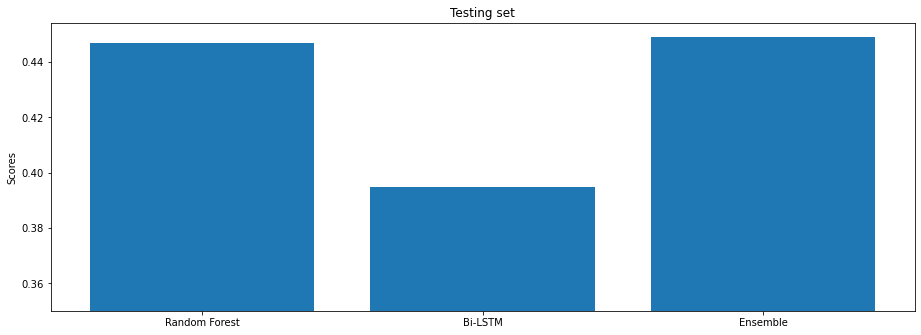

In [57]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_axes([0,0,2,1])

langs = [ 'Random Forest', 'Bi-LSTM', 'Ensemble']
scores = [ normal_t-0.35, accr[1]-0.35, avg_slight_rf-0.35]

ax.set_ylabel('Scores')
ax.set_title('Testing set')

ax.bar(langs,scores, bottom=0.35)
plt.show()

In [58]:
total_prec

0.48932393277320246

In [59]:
total_rec

0.45243274782100285

In [60]:
total_f1

0.45022701340488996